### What is layer normalization - 
Layer normalization is a crucial technique in transformer models that helps stabilize and accelerate training by normalizing the inputs to each layer. It ensures that the model processes information consistently, regardless of the input’s scale or distribution. 

In typical neural networks, activations of each layer can vary drastically which leads to issues like exploding or vanishing gradients which slow down training. Layer Normalization addresses this by normalizing the output of each layer which helps in ensuring that the activations stay within a stable range.

### why is layer normalization 

During training, the values inside a neural network can grow very large or very small. This causes:
* Unstable gradients
* Slow convergence
* Training difficulties

Normalization helps by keeping activations in a stable range.

### Why Not Use Batch Normalization?


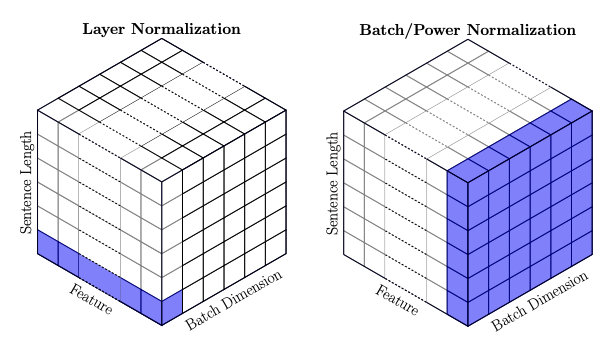


Batch Normalization (BatchNorm) normalizes data across the batch dimension.

It works like this:
* For each feature (or neuron),
* Compute the mean and variance across the entire batch
* Normalize all values of that feature using that batch mean and variance

So if you have n features, BatchNorm calculates n means and n variances across the batch.

Example:

Let's suppose we have two sequence: 
$$seq1=["I", "love", "deep", "learning"]$$
$$seq2=["Transformers", "are", "powerful"]$$


Assume:

$$Batch size = 2$$
$$Sequence length = 4$$
$$Embedding dimension (d_model) = 3$$


Let’s assume these are the embeddings:


Sequence 1
$$I          = [1, 2, 3]$$
$$love       = [2, 4, 6]$$
$$deep       = [3, 6, 9]$$
$$learning   = [4, 8, 12]$$


Sequence 2:

$$Transformers = [5, 10, 15]$$
$$are          = [6, 12, 18]$$
$$powerful     = [7, 13, 19]$$


So full batch tensor:
```py
[
  [[1,2,3], 
   [2,4,6], 
   [3,6,9], 
   [4,8,12]],

  [[5,10,15], 
   [6,12,18], 
   [7,13,19], 
   [0,0,0]] # padded sequence
]
```


BatchNorm normalizes feature-wise across the batch and sequence positions.

Let’s look at feature 1 (first dimension).

Collect all values from dim 1:


$$1, 2, 3, 4, 5, 6, 7, 0$$


$$mean=(1+2+3+4+5+6+7+0) / 8 = 3.5$$
$$std=2.29$$
With this mean and std we can caluclate the scaled/normalized value of first dim of all words.


For word "I" first dimension: 
$$(1 - 3.5) / 2.29 = -1.09$$


For word "powerful" first dimension:
$$(7 - 3.5) / 2.29=1.52$$







### Issue with BatchNorm in Transformers
* Dependency on Batch Size : BatchNorm depends on batch statistics. If the batch size is small, the statistics become noisy. Sometimes batch size is 1 (during inference).
* Padded sequence : In NLP tasks, sequences in a batch often have different lengths.
To make them equal in size, we pad shorter sequences with zeros (or a special PAD token). BatchNorm computes mean and variance across the batch for each feature dimension and pad tokens zeros aren't real data—they are just placeholders. Because different batches have different amounts of padding, the mean and variance become inconsistent.

### Layer Normalization
LayerNorm normalizes across the features of a single sample, not across the batch.

So instead of normalizing column-wise (across batch), we normalize row-wise (across features). It takes one token at a time and normalizes across its embedding dimensions.
Example: for the word "I" embedding vector - [1,2,3]

So 
$$mean=(1+2+3)/3=2$$
$$std=0.81$$

Now new embedding vector after layer normalization would be 
$$[(1-2)/0.81,(2-2)/0.81,(3-2)/0.81]$$
$$[-1.23,0,1.23]


For padded sequence:
$$[0,0,0]$$
$$mean=0$$
$$var=0$$
so padding will not affect the mean and variance